**Installing dependencies**

In [2]:
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister
from qiskit.visualization import circuit_drawer, plot_state_city, plot_state_qsphere, plot_bloch_multivector, plot_state_hinton, plot_state_paulivec
from qiskit.quantum_info import Statevector, DensityMatrix
from qiskit.providers.basic_provider import BasicSimulator
import numpy as np

**Deutsch-Jozsa Algorithm**

In [3]:
class DJosva:
    def __init__(self, num_qubits=2):
        self.num_qubits = num_qubits
        self.qc = self._create_djosva_circuit()
        self.qc1 = self._create_djosva_circuit1()
        self.sim_backend = BasicSimulator()
        self.result = None

    def _create_djosva_circuit(self):
        n = 2
        # Choose a type of oracle at random. With probability half it is constant,
        # and with the same probability it is balanced
        oracleType, oracleValue = np.random.randint(2), np.random.randint(2)

        if oracleType == 0:
            print("The oracle returns a constant value ", oracleValue)
        else:
            print("The oracle returns a balanced function")
            a = np.random.randint(1, 2**n)  # this is a hidden parameter for balanced oracle.

        # Creating registers
        # n qubits for querying the oracle and one qubit for storing the answer
        qr = QuantumRegister(n + 1)  # all qubits are initialized to zero
        # for recording the measurement on the first register
        cr = ClassicalRegister(n)

        circuitName = "DeutschJozsa"
        qc = QuantumCircuit(qr, cr)

        # Create the superposition of all input queries in the first register by applying the Hadamard gate to each qubit.
        for i in range(n):
            qc.h(qr[i])

        # Flip the second register and apply the Hadamard gate.
        qc.x(qr[n])
        qc.h(qr[n])

        # Apply barrier to mark the beginning of the oracle
        qc.barrier()

        if oracleType == 0:  # If the oracleType is "0", the oracle returns oracleValue for all input.
            if oracleValue == 1:
                qc.x(qr[n])
            else:
                qc.id(qr[n])
        else:  # Otherwise, it returns the inner product of the input with a (non-zero bitstring)
            for i in range(n):
                if (a & (1 << i)):
                    qc.cx(qr[i], qr[n])

        # Apply barrier to mark the end of the oracle
        qc.barrier()
        # Apply Hadamard gates after querying the oracle
        for i in range(n):
            qc.h(qr[i])

        # Measurement
        qc.barrier()
        for i in range(n):
            qc.measure(qr[i], cr[i])
        return qc

    def _create_djosva_circuit1(self):
        n = 2
        # Choose a type of oracle at random. With probability half it is constant,
        # and with the same probability it is balanced
        oracleType, oracleValue = np.random.randint(2), np.random.randint(2)

        if oracleType == 0:
            print("The oracle returns a constant value ", oracleValue)
        else:
            print("The oracle returns a balanced function")
            a = np.random.randint(1, 2**n)  # this is a hidden parameter for balanced oracle.

        # Creating registers
        # n qubits for querying the oracle and one qubit for storing the answer
        qr = QuantumRegister(n + 1)  # all qubits are initialized to zero
        # for recording the measurement on the first register
        cr = ClassicalRegister(n)

        circuitName = "DeutschJozsa"
        qc1 = QuantumCircuit(qr, cr)

        # Create the superposition of all input queries in the first register by applying the Hadamard gate to each qubit.
        for i in range(n):
            qc1.h(qr[i])

        # Flip the second register and apply the Hadamard gate.
        qc1.x(qr[n])
        qc1.h(qr[n])

        # Apply barrier to mark the beginning of the oracle
        qc1.barrier()

        if oracleType == 0:  # If the oracleType is "0", the oracle returns oracleValue for all input.
            if oracleValue == 1:
                qc1.x(qr[n])
            else:
                qc1.id(qr[n])
        else:  # Otherwise, it returns the inner product of the input with a (non-zero bitstring)
            for i in range(n):
                if (a & (1 << i)):
                    qc1.cx(qr[i], qr[n])

        # Apply barrier to mark the end of the oracle
        qc1.barrier()
        # Apply Hadamard gates after querying the oracle
        for i in range(n):
            qc1.h(qr[i])
        return qc1

    def run_simulation(self, shots=1024):
        #transpiled_qc = transpile(self.qc, self.sim_backend)
        job = self.sim_backend.run(self.qc, shots=shots)
        self.result = job.result()

    def run_simulation1(self, shots=1024):
        #transpiled_qc = transpile(self.qc, self.sim_backend)
        job = self.sim_backend.run(self.qc1, shots=shots)
        self.result = job.result()

    def get_counts(self):
        if self.result:
            return self.result.get_counts(self.qc)
        else:
            raise RuntimeError("Simulation has not been run yet.")

    def psi(self):
        psi = Statevector(self.qc1)
        return psi

    def get_density(self):
        psi = Statevector(self.qc1)
        return DensityMatrix(psi).draw("latex").data

    def get_city(self):
        psi = Statevector(self.qc1)
        return plot_state_city(psi)

    def get_circuit(self):
        return circuit_drawer(self.qc, output='mpl', filename='circuit.png')

    def get_hinton(self):
        psi = Statevector(self.qc1)
        return plot_state_hinton(psi)

    def get_paulivec(self):
        psi = Statevector(self.qc1)
        return plot_state_paulivec(psi)

    def get_qsphere(self):
        psi = Statevector(self.qc1)
        return plot_state_qsphere(psi)

    def get_bloch(self):
        psi = Statevector(self.qc1)
        return plot_bloch_multivector(psi)

**Running simulation with measurement**

In [4]:
simulator = DJosva(num_qubits=3)
simulator.run_simulation(shots = 1024)

The oracle returns a constant value  0
The oracle returns a constant value  1


**Counts**

In [5]:
simulator.get_counts()

{'00': 1024}

**Running simuation wihout measurements**

In [6]:
simulator.run_simulation1()

**Density matrix**

In [7]:
from IPython.display import display, Latex
dmatrix=simulator.get_density()
display(Latex(dmatrix))

<IPython.core.display.Latex object>

**Qsphere representation**

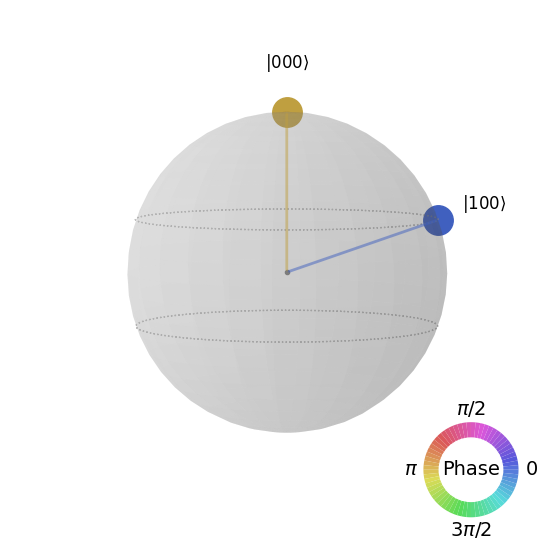

In [8]:
simulator.get_qsphere()

**City Representation**

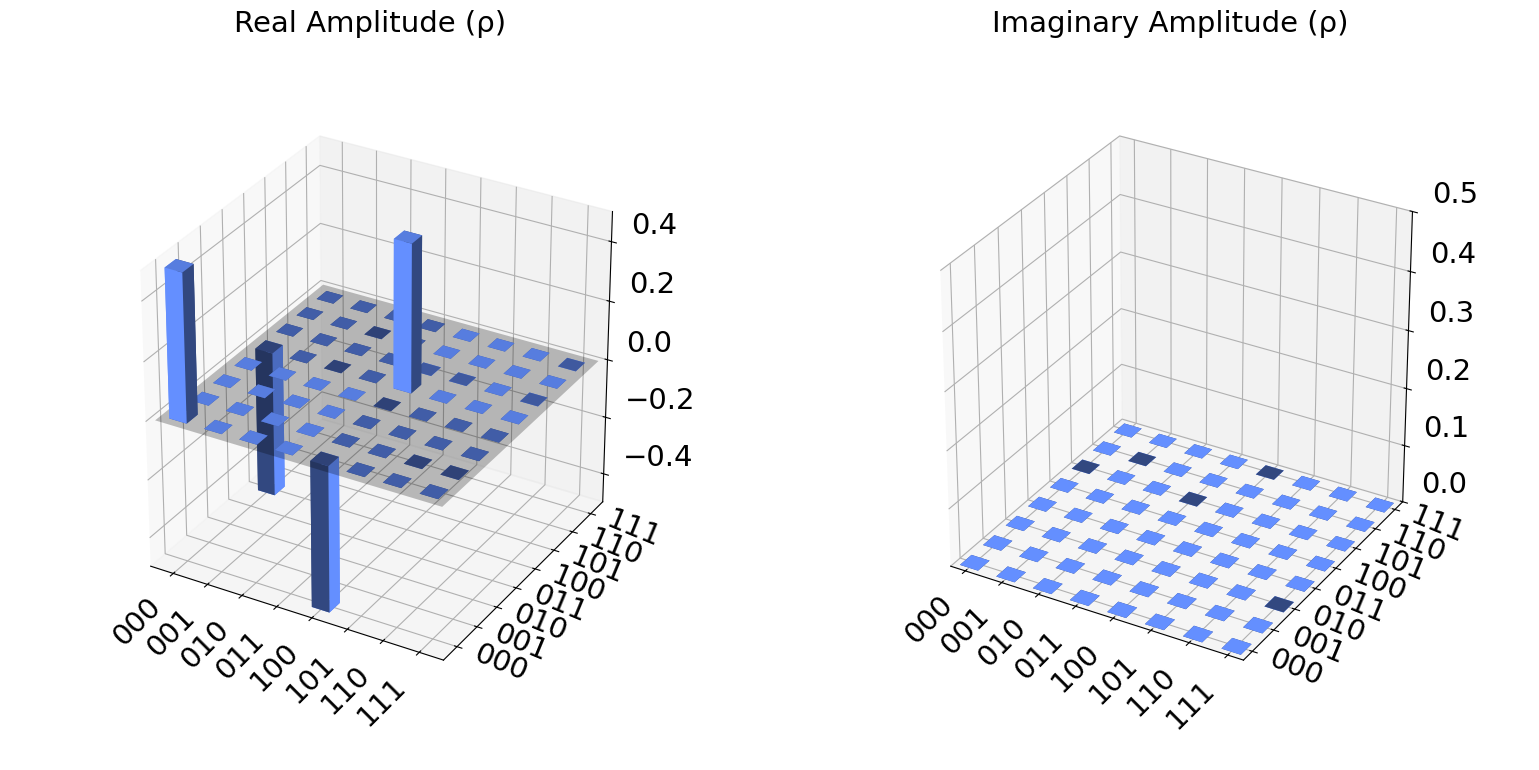

In [9]:
simulator.get_city()

**Circuit Representation**

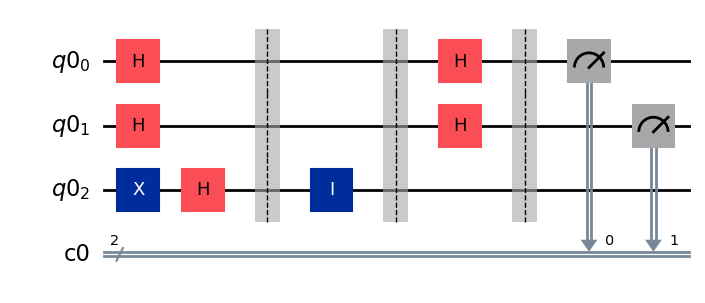

In [10]:
simulator.get_circuit()

**Hinton Representation**

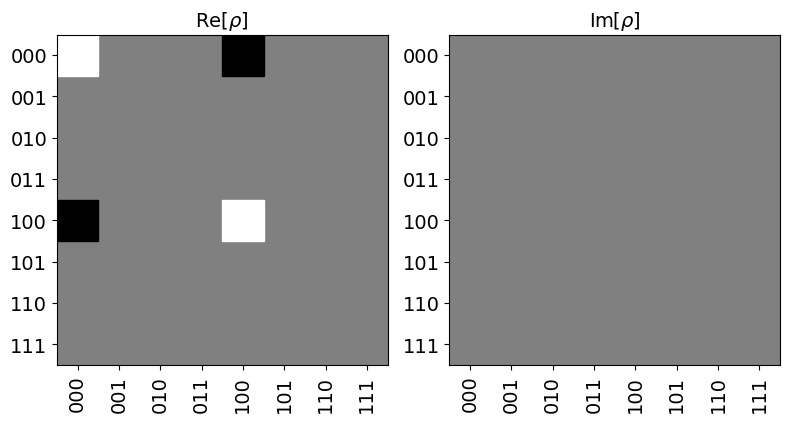

In [11]:
simulator.get_hinton()

**Paulivector Representation**

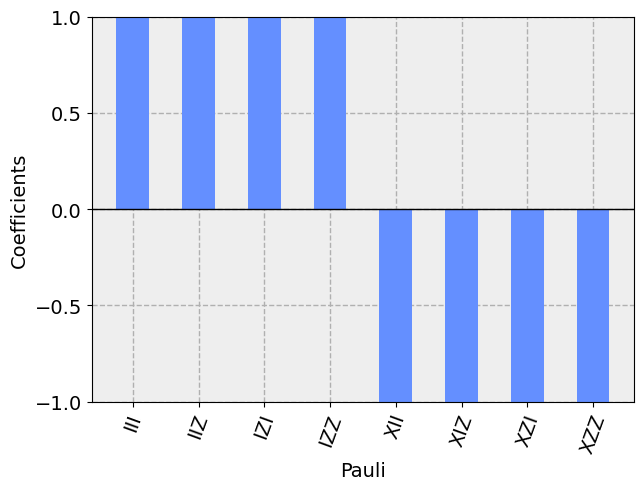

In [12]:
simulator.get_paulivec()

**Bloch sphere Representation**

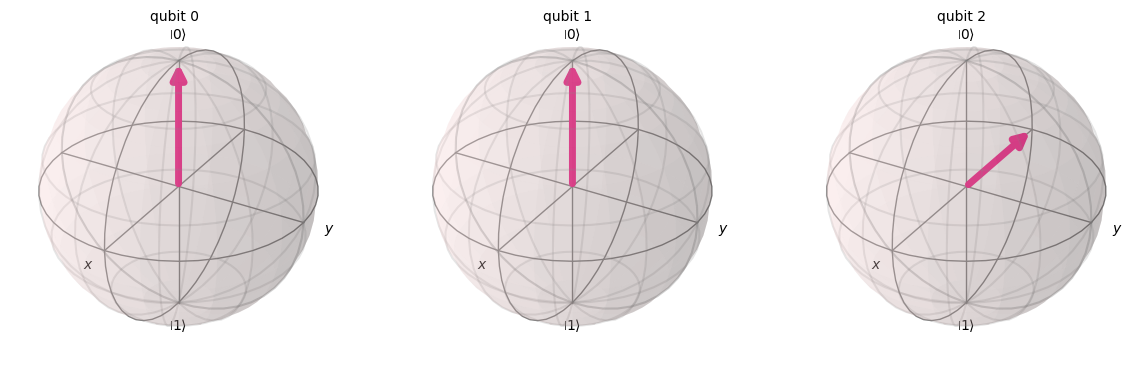

In [13]:
simulator.get_bloch()